# South Tyrol Travel Assistant: A Beginner's Guide to GenAI Travel Planning

Welcome to the South Tyrol Travel Assistant! This notebook demonstrates how artificial intelligence can help plan your perfect trip to the beautiful region of South Tyrol in northern Italy.

**What is South Tyrol?** South Tyrol (also known as Alto Adige) is an autonomous province in northern Italy, bordering Austria and Switzerland. It's known for its stunning Alpine landscapes, blend of Italian and Germanic cultures, world-class skiing, hiking trails, and exceptional cuisine.

![South Tyrol](https://upload.wikimedia.org/wikipedia/commons/thumb/5/59/Suedtirol_CoA.svg/383px-Suedtirol_CoA.svg.png)

**Who is this notebook for?** This guide is designed for:
- Beginners to generative AI who want to see practical applications
- Travel enthusiasts interested in planning a South Tyrol trip
- Students learning about AI's real-world uses in tourism
- Developers curious about implementing GenAI capabilities

No prior knowledge of South Tyrol or advanced AI concepts is required!

## Project Overview

This notebook creates an interactive travel planning assistant focused specifically on South Tyrol, using Google's latest generative AI capabilities. Whether you're planning a hiking adventure, cultural exploration, or culinary tour, our assistant helps you discover the perfect attractions and create personalized itineraries.

### The Magic Behind This Assistant

Even if you're new to AI, you can understand the core technologies powering this assistant:

1. **Vector Search** - Think of this as the assistant's memory system. It converts descriptions of attractions into numerical representations (vectors) that capture their meaning, allowing the system to find relevant places based on your requests.

2. **RAG (Retrieval-Augmented Generation)** - This combines the assistant's knowledge with factual information about South Tyrol. When you ask a question, it first retrieves relevant facts, then crafts a helpful response based on those facts.

3. **Few-Shot Prompting** - This is like teaching by example. We provide sample trip itineraries, allowing the AI to learn the pattern and create new, personalized itineraries in the same style.

4. **Function Calling** - This connects our assistant to the real world. It can check weather forecasts for your trip dates by calling external APIs (application programming interfaces).

### Problem Statement

Planning a trip to South Tyrol can be overwhelming for several reasons:

- **Information Overload**: With hundreds of attractions across multiple categories (hiking, skiing, cultural sites, restaurants), it's hard to know where to start
- **Seasonal Considerations**: Activities vary greatly by season - ski resorts in winter, hiking trails in summer
- **Language Barriers**: The region's trilingual nature (Italian, German, Ladin) can make research challenging
- **Logistics Complexity**: Planning transportation between mountain locations requires local knowledge

### Comparing Traditional vs. AI-Powered Travel Planning

| Aspect | Traditional Travel Planning | AI-Powered Assistant (Our Approach) |
|--------|------------------------------|-------------------------------------|
| Information Discovery | Manual searching through websites and guidebooks | Semantic search finds relevant attractions based on natural language descriptions |
| Personalization | Generic recommendations or extensive filtering | Intelligent matching of preferences to attractions and activities |
| Trip Organization | Manual coordination and scheduling | Automated creation of balanced, logistically sensible itineraries |
| Local Knowledge | Limited to published information, potentially outdated | Combined with real-time data (weather, etc.) for current information |
| Time Investment | Hours of research across multiple sources | Complete planning in minutes with natural conversation |
| Adaptation | Difficult to adjust plans when circumstances change | Rapidly regenerate itineraries with new constraints |

This comparison highlights why an AI-powered approach significantly improves the travel planning experience, especially for complex destinations like South Tyrol with diverse attractions and regional considerations.

### How Our AI Solution Helps

Our assistant simplifies trip planning by:
- Finding attractions that match your specific interests using semantic search
- Providing up-to-date, relevant information about each attraction
- Creating personalized itineraries based on your preferences and timeframe
- Accessing real-time weather information to inform your planning



```mermaid
graph TD
    User[User] -->|Query| Interface
    
    subgraph "South Tyrol Travel Assistant"
        Interface[Interactive Interface] --> VectorSearch
        Interface --> RAG
        Interface --> FunctionCall
        Interface --> FewShot
        
        subgraph DataLayer["Data Layer"]
            DB[(Attraction Database)]
            Embeddings[(Vector Embeddings)]
            Examples[(Example Itineraries)]
        end
        
        subgraph AICapabilities["AI Capabilities"]
            VectorSearch[Vector Search]
            RAG[Retrieval-Augmented Generation]
            FunctionCall[Function Calling]
            FewShot[Few-Shot Prompting]
        end
        
        DB --> VectorSearch
        Embeddings --> VectorSearch
        DB --> RAG
        VectorSearch --> RAG
        
        WeatherAPI[Weather API] --> FunctionCall
        Examples --> FewShot
    end
    
    VectorSearch -->|Matching Attractions| Interface
    RAG -->|Informative Responses| Interface
    FunctionCall -->|Weather Data| Interface
    FewShot -->|Custom Itineraries| Interface
    Interface -->|Results| User
    
    style User fill:#f9f,stroke:#333,stroke-width:2px
    style Interface fill:#bbf,stroke:#333,stroke-width:2px
    style AICapabilities fill:#dfd,stroke:#333,stroke-width:2px
    style DataLayer fill:#ffd,stroke:#333,stroke-width:2px
```

### Learning Objectives

By the end of this notebook, you will be able to:
- Implement vector search to enable semantic understanding of user queries
- Build a RAG system to ground AI responses in factual information
- Create function calling mechanisms to access real-time external data
- Apply few-shot prompting to generate complex, structured outputs
- Understand common challenges and solutions in GenAI applications

## Setup and Dependencies: Getting Started

Before we dive into travel planning, let's set up our notebook with the necessary tools. If you're new to programming, think of this section as gathering and organizing the ingredients before cooking.

### What We're Installing

- **google-genai**: Google's official Python library for accessing their AI models
- **python-dotenv**: For securely handling API keys
- **pandas & numpy**: For organizing and manipulating our data
- **faiss-cpu**: A library specialized in efficient similarity search (our vector store)
- **requests**: For making API calls to external services like weather data
- **geopy**: For handling geographic data and locations

> **Note for Beginners**: In Jupyter notebooks, code cells with a `!` at the beginning are running shell commands, which install packages. The imports that follow make those packages available in our code.


In [1]:
def install_kaggle_dependencies():
    """
    Conservative approach to fix dependencies for Kaggle notebooks
    that maintains compatibility with Google services and ML libraries.
    """
    import sys
    from IPython.display import clear_output
    
    print("Starting conservative dependency resolution...")
    
    # Step 1: Install NumPy first with specific version to prevent overrides
    print("\n--- Installing NumPy with compatible version ---")
    !pip uninstall -y numpy
    !pip install numpy==1.26.4 --no-deps --force-reinstall
    
    # Step 2: Uninstall conflicting packages
    print("\n--- Removing conflicting packages ---")
    !pip uninstall -y ipykernel ipython notebook jupyterlab jupyter-lsp jupyterlab-lsp
    
    # Step 3: Install Jupyter-related packages with exact versions
    print("\n--- Installing Jupyter ecosystem ---")
    !pip install ipykernel==5.5.6 --no-deps
    !pip install ipython==7.34.0 --no-deps
    !pip install jupyter-lsp==2.2.5
    !pip install notebook==6.5.5
    !pip install jupyterlab==3.6.8
    !pip install jupyterlab-lsp==3.10.2
    !pip install python-dotenv    
    !pip install faiss-cpu
    !pip install scikit-learn  # Often used with FAISS

    # Step 4: Install pandas with careful version control
    print("\n--- Installing pandas ---")
    !pip install pandas==2.2.2 --ignore-installed --no-deps
    # Reinstall dependencies explicitly to avoid pulling wrong NumPy
    !pip install pytz tzdata python-dateutil six --ignore-installed
    
    # Step 5: Fix async-timeout for LangChain
    print("\n--- Fixing LangChain dependency ---")
    !pip install async-timeout==4.0.3 --force-reinstall
    
    # Step 6: Use existing Google GenerativeAI (don't upgrade)
    print("\n--- Installing AI packages ---")
    !pip install langchain-core==0.3.51
    !pip install langchain-google-genai==2.0.10
    
    # Step 7: Check installation
    !pip list | grep -E "^numpy|^pandas|^ipykernel|^jupyter|^google-generativeai|^langchain"
    
    print("\n--- Verifying NumPy version ---")
    !pip show numpy | grep -E "Name|Version"
    
    # Show a warning about restarting
    print("\n⚠️ IMPORTANT: You MUST restart the runtime for these changes to take effect!")
    print("After restarting, verify that imports work properly with the code below.")

# Code to verify installation after restarting
def verify_installation():
    """Verify that key packages are working properly"""
    import sys
    import numpy as np
    import pandas as pd
    import google.generativeai as genai
    from langchain_core.prompts import ChatPromptTemplate
    
    print(f"Python version: {sys.version}")
    print(f"NumPy version: {np.__version__}")
    print(f"Pandas version: {pd.__version__}")
    print(f"Google Generative AI version: {genai.__version__}")
    
    # Test NumPy
    arr = np.array([1, 2, 3])
    print(f"\nNumPy array: {arr}")
    
    # Test pandas
    df = pd.DataFrame({'A': [1, 2, 3], 'B': ['a', 'b', 'c']})
    print("\nPandas DataFrame:")
    print(df)
    
    print("\n✅ Verification complete! Your environment should be working correctly.")

# Run the installation
install_kaggle_dependencies()

# After restarting kernel, run:
verify_installation()

Starting conservative dependency resolution...

--- Installing NumPy with compatible version ---
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 66.2 MB/s eta 0:00:00

--- Removing conflicting packages ---
Found existing installation: ipykernel 5.5.6
Uninstalling ipykernel-5.5.6:
  Successfully uninstalled ipykernel-5.5.6
Found existing installation: ipython 7.34.0
Uninstalling ipython-7.34.0:
  Successfully uninstalled ipython-7.34.0
Found existing installation: notebook 6.5.4
Uninstalling notebook-6.5.4:
  Successfully uninstalled notebook-6.5.4
Found existing installation: jupyterlab 3.6.8
Uninstalling jupyterlab-3.6.8:
  Successfully uninstalled jupyterlab-3.6.8
Found existing installation: jupyter-lsp 1.5.1
Uninstalling jupyter-lsp-1.5.1:
  Successfully uninstalled jupyter-lsp-1.5.1
Fou

In [2]:
from google import genai
from google.genai import types
from google.api_core import retry
from IPython.display import Markdown

from dotenv import load_dotenv

import pandas as pd
import numpy as np
genai.__version__

'0.2.2'

## API Key Setup

This cell provides a robust authentication system for Google's GenAI services that works across different environments:

- Tries to find your API key from multiple sources (environment variables, `.env` file, or Kaggle secrets)
- Validates the key with a test request before proceeding
- Provides clear error messages with specific troubleshooting steps
- Ensures compatibility between local development and Kaggle notebook environments

The flexible design allows you to run this notebook locally during development and then deploy it on Kaggle without code changes.

In [3]:
# Update and validate  Google API key
import os
from dotenv import load_dotenv
import google.generativeai as genai


# Function to validate and set up the API key
def setup_api_key():
    """Set up and validate the Google API key with proper error handling."""
    
    # Step 1: Try multiple sources for the API key
    api_key = None
    
    # Try loading from environment variable first
    api_key = os.getenv("GOOGLE_API_KEY")
    
    # If not found, try loading from .env file
    if not api_key:
        load_dotenv()
        api_key = os.getenv("GOOGLE_API_KEY")
    
    # If still not found, try Kaggle secrets
    if not api_key:
        try:
            from kaggle_secrets import UserSecretsClient
            api_key = UserSecretsClient().get_secret("GOOGLE_API_KEY")
        except:
            print("Could not load API key from Kaggle secrets.")
    
    # Step 2: Validate the API key
    if not api_key:
        print("⚠️ No API key found.")
        print("Please set your Google API key using one of these methods:")
        print("1. Set an environment variable: GOOGLE_API_KEY=your_key")
        print("2. Create a .env file with: GOOGLE_API_KEY=your_key")
        print("3. Add to Kaggle secrets with name 'GOOGLE_API_KEY'")
        return None
    
    # Step 3: Test the API key with a minimal query
    try:
        genai.configure(api_key=api_key)
        # Simple test to verify key works - use a minimal model query
        genai.GenerativeModel('gemini-2.0-flash').generate_content("test")
        print("✅ API key validated successfully!")
        return api_key
    except Exception as e:
        error_msg = str(e)
        print(f"⚠️ API key validation failed: {error_msg}")
        
        if "API key not valid" in error_msg:
            print("\nPlease check that your API key is correct and has access to Google Gemini models.")
            print("You may need to create a new API key at: https://makersuite.google.com/app/apikey")
        elif "quota" in error_msg.lower() or "rate" in error_msg.lower():
            print("\nYou've reached your API quota or rate limit.")
            print("Wait a few minutes and try again, or create a new API key.")
        
        return None

# Run the API key setup and validation
GOOGLE_API_KEY = setup_api_key()

# Only proceed with the rest of your code if API key is valid
if GOOGLE_API_KEY:
    # Configure the GenAI library with the validated key
    genai.configure(api_key=GOOGLE_API_KEY)
    print("Ready to use Google's Generative AI models")
else:
    print("Please fix your API key issues before continuing")

✅ API key validated successfully!
Ready to use Google's Generative AI models


 ## Data Collection and Preparation: Getting to Know South Tyrol

In this section, we build our knowledge base of South Tyrol attractions. This is the foundation that allows our AI assistant to make informed recommendations.

### Understanding South Tyrol's Attractions

South Tyrol offers diverse experiences across several categories:

- **Hiking & Nature**: The Dolomites (a UNESCO World Heritage site) offer breathtaking mountain landscapes with well-maintained trails of varying difficulty
- **Cultural Sites**: Museums, castles, and historic towns showcase the region's unique blend of Italian and Germanic influences
- **Winter Sports**: World-class ski resorts attract visitors from December through March
- **Culinary Experiences**: Local specialties include speck (smoked ham), canederli (bread dumplings), and excellent wines

### How Our Data is Structured

For each attraction, we store:

- **Name**: The attraction's official name
- **Category**: Type of attraction (hiking, cultural, skiing, culinary)
- **Location**: City or area within South Tyrol
- **Season**: Best time to visit (summer, winter, all year)
- **Difficulty**: For activities like hiking (easy, moderate, challenging)
- **Price Range**: Cost category (free, low, medium, high)
- **Description**: Detailed information about the attraction

We've carefully selected 20 top attractions across different categories to seed our system. In a production environment, this dataset would be much larger and continually updated.

### Example Itineraries for Learning

We've also created sample itineraries that our AI will learn from. These demonstrate:

- Different trip durations (2-4 days)
- Various focus areas (cultural, hiking, skiing, culinary)
- Realistic daily planning with appropriate pacing
- Logical geographic progression (minimizing travel time)

> **For Beginners**: These sample itineraries act as "examples" that help the AI understand the format and quality expected in its responses, similar to how we might show examples to a human assistant.

Loading South Tyrol attractions data...
Successfully loaded dataset with 81 attractions
Available columns: name, category, location, season, difficulty, price_range, description

--- Dataset Summary ---
Total attractions: 81

--- Categories ---
category
hiking        12
cultural      11
skiing        11
culinary      11
adventure      8
historical     8
family         8
wellness       7
events         5
Name: count, dtype: int64


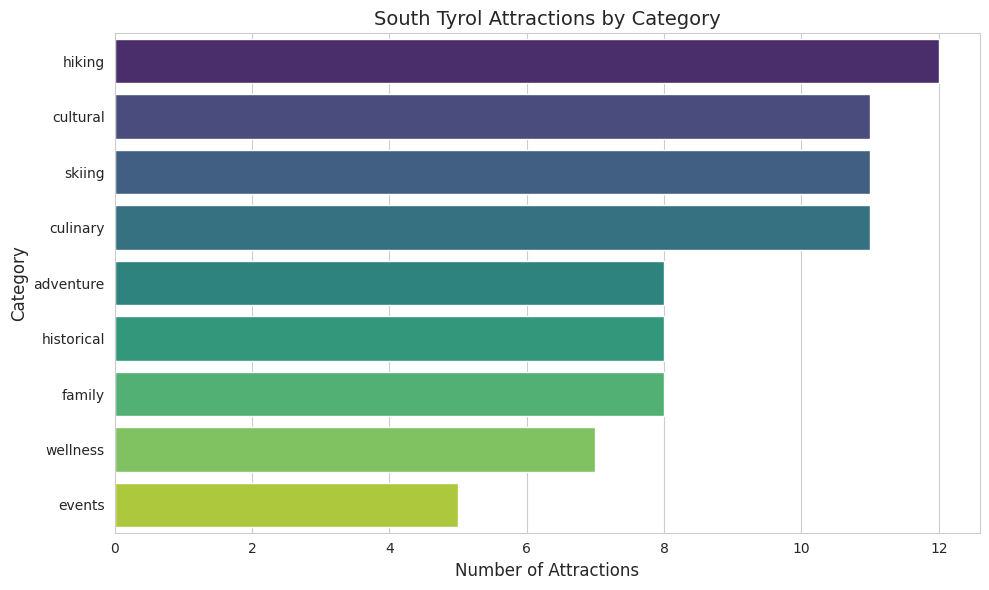


--- Category Summary ---
     category  count
0   adventure      8
1    culinary     11
2    cultural     11
3      events      5
4      family      8
5      hiking     12
6  historical      8
7      skiing     11
8    wellness      7

--- Sample Attractions by Category ---
     category                      name  \
0   adventure  Kronplatz Adventure Park   
1    culinary  South Tyrolean Wine Road   
2    cultural   Messner Mountain Museum   
3      events         Christmas Markets   
4      family            Alpine Coaster   
5      hiking                 Dolomites   
6  historical    Trauttmansdorff Castle   
7      skiing                Seiser Alm   
8    wellness              Terme Merano   

                                         description  
0  High ropes course with zip lines and challengi...  
1  Scenic route through vineyards with wine tasti...  
2  A museum dedicated to mountaineering and mount...  
3  Traditional Christmas markets with local craft...  
4  Exciting tobogg

In [4]:
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from kagglehub import KaggleDatasetAdapter

def load_south_tyrol_data():
    """
    Load South Tyrol attractions dataset using the functional kagglehub method.
    """
    # Define file path and dataset
    file_path = "south_tyrol_attractions.csv"
    dataset_name = "danielmllenbeck/south-tyrol-data"
    
    try:
        # Using the method that works (despite deprecation warning)
        # We'll suppress the warning in production code
        import warnings
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            attractions_df = kagglehub.load_dataset(
                KaggleDatasetAdapter.PANDAS,
                dataset_name,
                file_path
            )
        print(f"Successfully loaded dataset with {len(attractions_df)} attractions")
        
        # Print column names to understand dataset structure
        print(f"Available columns: {', '.join(attractions_df.columns)}")
        
        return attractions_df
        
    except Exception as e:
        print(f"Failed to load dataset: {e}")
        
        # Fall back to local path
        try:
            local_fallback = f'../input/{dataset_name.split("/")[1]}/{file_path}'
            print(f"Attempting to load from local path: {local_fallback}")
            return pd.read_csv(local_fallback)
        except Exception as e2:
            print(f"All methods failed. Last error: {e2}")
            return None

def visualize_attractions(df):
    """Create informative visualizations for the attractions dataset"""
    
    if df is None:
        return None
    
    # Set up the visualization style
    sns.set_style("whitegrid")
    
    # Category distribution
    plt.figure(figsize=(10, 6))
    category_counts = df['category'].value_counts()
    sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")
    plt.title('South Tyrol Attractions by Category', fontsize=14)
    plt.xlabel('Number of Attractions', fontsize=12)
    plt.ylabel('Category', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Create a summary table of attractions by category - just count, no geographical data
    category_summary = df.groupby('category').agg({
        'name': 'count'
    }).rename(columns={'name': 'count'}).reset_index()
    
    return category_summary

def analyze_attractions(df):
    """Perform additional analysis on the attractions data"""
    if df is None:
        return
    
    # Display sample attractions from each category
    print("\n--- Sample Attractions by Category ---")
    sample_attractions = df.groupby('category').first().reset_index()
    
    # Select columns that exist in the DataFrame for display
    display_cols = ['category', 'name']
    # Add description column if it exists
    if 'description' in df.columns:
        display_cols.append('description')
    
    return sample_attractions[display_cols]

# Main execution
print("Loading South Tyrol attractions data...")
attractions_df = load_south_tyrol_data()

if attractions_df is not None:
    # Basic statistics
    print("\n--- Dataset Summary ---")
    print(f"Total attractions: {len(attractions_df)}")
    
    # Category distribution
    print("\n--- Categories ---")
    print(attractions_df['category'].value_counts())
    
    # Visualization
    category_summary = visualize_attractions(attractions_df)
    print("\n--- Category Summary ---")
    if category_summary is not None:
        print(category_summary)
    
    # Sample analysis
    sample_data = analyze_attractions(attractions_df)
    if sample_data is not None:
        print(sample_data)

In [5]:
sample_itineraries = [
    # Original itineraries from notebook
    {
        "title": "Weekend Cultural Tour",
        "duration": "2 days",
        "focus": "cultural",
        "season": "all",
        "itinerary": [
            {
                "day": 1,
                "activities": [
                    "Visit Ötzi Museum in the morning",
                    "Explore Bolzano's historic center in the afternoon",
                    "Dinner at a traditional South Tyrolean restaurant"
                ]
            },
            {
                "day": 2,
                "activities": [
                    "Visit Messner Mountain Museum",
                    "Short hike in the surrounding area",
                    "Return to Bolzano for departure"
                ]
            }
        ]
    },
    {
        "title": "Summer Hiking Adventure",
        "duration": "3 days",
        "focus": "hiking",
        "season": "summer",
        "itinerary": [
            {
                "day": 1,
                "activities": [
                    "Arrive in Val Gardena",
                    "Easy hike to Seceda viewpoint",
                    "Relax at hotel spa"
                ]
            },
            {
                "day": 2,
                "activities": [
                    "Full-day hike in the Dolomites",
                    "Picnic lunch with local specialties",
                    "Evening in mountain hut"
                ]
            },
            {
                "day": 3,
                "activities": [
                    "Morning hike to Gardena Pass",
                    "Lunch in local restaurant",
                    "Return to valley and departure"
                ]
            }
        ]
    },
    {
        "title": "Winter Sports Getaway",
        "duration": "4 days",
        "focus": "skiing",
        "season": "winter",
        "itinerary": [
            {
                "day": 1,
                "activities": [
                    "Arrive in Val Gardena",
                    "Equipment rental and ski pass purchase",
                    "Evening relaxation at hotel spa"
                ]
            },
            {
                "day": 2,
                "activities": [
                    "Full day of skiing in Val Gardena",
                    "Lunch at mountain restaurant",
                    "Après-ski in local bars"
                ]
            },
            {
                "day": 3,
                "activities": [
                    "Ski tour around Sella Ronda",
                    "Lunch at different mountain huts",
                    "Evening in traditional restaurant"
                ]
            },
            {
                "day": 4,
                "activities": [
                    "Morning skiing in Alta Badia",
                    "Lunch and equipment return",
                    "Departure"
                ]
            }
        ]
    },
    {
        "title": "Culinary Experience",
        "duration": "3 days",
        "focus": "culinary",
        "season": "autumn",
        "itinerary": [
            {
                "day": 1,
                "activities": [
                    "Arrive in South Tyrol",
                    "Visit Speck Museum with tasting",
                    "Dinner at traditional restaurant"
                ]
            },
            {
                "day": 2,
                "activities": [
                    "Wine tasting along South Tyrolean Wine Road",
                    "Lunch at local winery",
                    "Visit to Alpine Cheese Dairy"
                ]
            },
            {
                "day": 3,
                "activities": [
                    "Apple Trail walk and tasting",
                    "Lunch at mountain hut",
                    "Departure"
                ]
            }
        ]
    },
    
    # New expanded itineraries
    {
        "title": "Wellness Retreat",
        "duration": "4 days",
        "focus": "wellness",
        "season": "all",
        "itinerary": [
            {
                "day": 1,
                "activities": [
                    "Arrive in Merano",
                    "Visit Terme Merano for afternoon thermal baths",
                    "Gentle evening walk through Merano's gardens"
                ]
            },
            {
                "day": 2,
                "activities": [
                    "Morning yoga session at hotel",
                    "Full day at Terme Merano with spa treatments",
                    "Dinner featuring local organic produce"
                ]
            },
            {
                "day": 3,
                "activities": [
                    "Day trip to Adler Spa Resort Dolomiti",
                    "Mountain wellness experiences and panoramic sauna",
                    "Relaxation time in thermal pools"
                ]
            },
            {
                "day": 4,
                "activities": [
                    "Morning massage treatment",
                    "Stroll through Trauttmansdorff Castle Gardens",
                    "Departure"
                ]
            }
        ]
    },
    {
        "title": "Family Alpine Adventure",
        "duration": "5 days",
        "focus": "family",
        "season": "summer",
        "itinerary": [
            {
                "day": 1,
                "activities": [
                    "Arrive in Bolzano",
                    "Visit MMM Firmian for interactive exhibits",
                    "Evening exploration of Bolzano city center"
                ]
            },
            {
                "day": 2,
                "activities": [
                    "Travel to Dobbiaco",
                    "Visit Wildlife Park to see alpine animals",
                    "Easy family-friendly hike around Lake Braies"
                ]
            },
            {
                "day": 3,
                "activities": [
                    "Morning at Planetarium Alto Adige",
                    "Picnic lunch in nature",
                    "Afternoon at Adventure Park Cron4"
                ]
            },
            {
                "day": 4,
                "activities": [
                    "Day trip to Klausberg",
                    "Alpine Coaster rides and mountain activities",
                    "Dinner at family-friendly restaurant"
                ]
            },
            {
                "day": 5,
                "activities": [
                    "Visit South Tyrol Museum of Mining",
                    "Underground mine tour experience",
                    "Departure"
                ]
            }
        ]
    },
    {
        "title": "Historical South Tyrol Discovery",
        "duration": "3 days",
        "focus": "historical",
        "season": "spring",
        "itinerary": [
            {
                "day": 1,
                "activities": [
                    "Arrive in Bolzano",
                    "Visit South Tyrol Museum of Archaeology (Ötzi)",
                    "Guided walking tour of Mareccio Castle",
                    "Evening in Bolzano's historic center"
                ]
            },
            {
                "day": 2,
                "activities": [
                    "Drive to Merano",
                    "Full morning at Trauttmansdorff Castle and botanical gardens",
                    "Lunch in Merano's old town",
                    "Visit to Palais Mamming Museum"
                ]
            },
            {
                "day": 3,
                "activities": [
                    "Day trip to Val Venosta",
                    "Explore the medieval walled town of Glorenza",
                    "Visit to Monastery of Sabiona",
                    "Departure"
                ]
            }
        ]
    },
    {
        "title": "Adventure Seeker's Challenge",
        "duration": "4 days",
        "focus": "adventure",
        "season": "summer",
        "itinerary": [
            {
                "day": 1,
                "activities": [
                    "Arrive in Bruneck",
                    "Afternoon at Kronplatz Adventure Park",
                    "Equipment preparation for upcoming adventures"
                ]
            },
            {
                "day": 2,
                "activities": [
                    "Full day of mountain biking in Latemar",
                    "Lunch at mountain refuge",
                    "Evening relaxation in Bruneck"
                ]
            },
            {
                "day": 3,
                "activities": [
                    "Travel to Val Gardena",
                    "Paragliding experience over the Dolomites",
                    "Dinner in traditional restaurant"
                ]
            },
            {
                "day": 4,
                "activities": [
                    "Morning canyoning in Val di Fanes",
                    "Afternoon Via Ferrata at Piz da Lech for advanced climbers",
                    "Departure"
                ]
            }
        ]
    },
    {
        "title": "Winter Family Holiday",
        "duration": "6 days",
        "focus": "family",
        "season": "winter",
        "itinerary": [
            {
                "day": 1,
                "activities": [
                    "Arrive in Valles",
                    "Check in to family-friendly accommodation",
                    "Explore the Christmas Market in nearby town"
                ]
            },
            {
                "day": 2,
                "activities": [
                    "Beginner ski lessons at Gitschberg Jochtal",
                    "Lunch at slope-side restaurant",
                    "Evening sledding activity"
                ]
            },
            {
                "day": 3,
                "activities": [
                    "More skiing at Gitschberg Jochtal",
                    "Hot chocolate breaks",
                    "Visit to Planetarium Alto Adige"
                ]
            },
            {
                "day": 4,
                "activities": [
                    "Snow tubing and winter activities",
                    "Building snowmen and snow castles",
                    "Indoor swimming at hotel pool"
                ]
            },
            {
                "day": 5,
                "activities": [
                    "Day trip to Bolzano",
                    "Visit to Ötzi Museum",
                    "Shopping in historic center"
                ]
            },
            {
                "day": 6,
                "activities": [
                    "Final morning of winter activities",
                    "Lunch and farewells",
                    "Departure"
                ]
            }
        ]
    },
    {
        "title": "Autumn Colors and Harvest",
        "duration": "5 days",
        "focus": "culinary",
        "season": "autumn",
        "itinerary": [
            {
                "day": 1,
                "activities": [
                    "Arrive in Eisack Valley",
                    "Visit vineyard during harvest season",
                    "Evening Törggelen experience with new wine and seasonal foods"
                ]
            },
            {
                "day": 2,
                "activities": [
                    "Morning at Apple Trail during harvest",
                    "Apple picking activity",
                    "Visit to Bolzano Food Market",
                    "Cooking class featuring autumn ingredients"
                ]
            },
            {
                "day": 3,
                "activities": [
                    "Day trip to Naz-Sciaves",
                    "Participate in Apple Festival activities",
                    "Tasting of apple-based products",
                    "Traditional dinner with roasted chestnuts"
                ]
            },
            {
                "day": 4,
                "activities": [
                    "Scenic drive to Val Senales",
                    "Experience the Transhumance Festival",
                    "Lunch featuring fresh Alpine cheese",
                    "Evening wine tasting"
                ]
            },
            {
                "day": 5,
                "activities": [
                    "Visit to Brewery Forst",
                    "Beer tasting and brewery tour",
                    "Final South Tyrolean feast",
                    "Departure"
                ]
            }
        ]
    },
    {
        "title": "Cultural and Musical Spring",
        "duration": "4 days",
        "focus": "cultural",
        "season": "spring",
        "itinerary": [
            {
                "day": 1,
                "activities": [
                    "Arrive in Merano",
                    "Visit to Merano Teatro Puccini",
                    "Evening concert performance",
                    "Dinner in the old town"
                ]
            },
            {
                "day": 2,
                "activities": [
                    "Explore Merano Flower Festival",
                    "Lunch in garden setting",
                    "Visit to Museum of Modern and Contemporary Art",
                    "Evening classical music event"
                ]
            },
            {
                "day": 3,
                "activities": [
                    "Day trip to Bressanone",
                    "Tour of Cathedral of Bressanone",
                    "Visit Abbey of Novacella with Baroque architecture",
                    "Wine tasting at the abbey's historic winery"
                ]
            },
            {
                "day": 4,
                "activities": [
                    "Morning visit to Piazza Walther in Bolzano",
                    "Explore Museion contemporary art museum",
                    "Farewell lunch with local specialties",
                    "Departure"
                ]
            }
        ]
    },
    {
        "title": "Challenging Dolomites Hiking Tour",
        "duration": "6 days",
        "focus": "hiking",
        "season": "summer",
        "itinerary": [
            {
                "day": 1,
                "activities": [
                    "Arrive in Seis am Schlern",
                    "Acclimatization hike on Alpe di Siusi",
                    "Evening equipment check and route planning"
                ]
            },
            {
                "day": 2,
                "activities": [
                    "Full day hike to Schlern summit",
                    "Picnic lunch with panoramic views",
                    "Overnight at mountain refuge"
                ]
            },
            {
                "day": 3,
                "activities": [
                    "Hike to Sesto Dolomites",
                    "Challenging trail around Tre Cime di Lavaredo",
                    "Second night in different mountain hut"
                ]
            },
            {
                "day": 4,
                "activities": [
                    "Hike to Val Gardena region",
                    "Explore trails in Puez-Geisler Nature Park",
                    "Return to valley accommodation"
                ]
            },
            {
                "day": 5,
                "activities": [
                    "Cable car to Seceda ridgeline",
                    "Full-day high-altitude hike along the iconic ridge",
                    "Return to village for typical Ladin dinner"
                ]
            },
            {
                "day": 6,
                "activities": [
                    "Morning visit to Ladin Museum to learn about mountain culture",
                    "Short farewell hike in Val di Funes with classic Dolomites views",
                    "Departure"
                ]
            }
        ]
    },
    {
        "title": "Expert Skier's Dream",
        "duration": "7 days",
        "focus": "skiing",
        "season": "winter",
        "itinerary": [
            {
                "day": 1,
                "activities": [
                    "Arrive in Alta Badia",
                    "Equipment rental and setup",
                    "Orientation ski session on local slopes",
                    "Welcome dinner at gourmet restaurant"
                ]
            },
            {
                "day": 2,
                "activities": [
                    "Full day skiing in Alta Badia",
                    "Test runs on various difficulty levels",
                    "Evening ski equipment maintenance session"
                ]
            },
            {
                "day": 3,
                "activities": [
                    "Complete Sella Ronda circuit clockwise",
                    "Lunch at mountain hut in Val Gardena section",
                    "Après-ski in Corvara"
                ]
            },
            {
                "day": 4,
                "activities": [
                    "Transfer to Kronplatz",
                    "Full day exploring Kronplatz slopes",
                    "Visit to MMM Corones at summit",
                    "Return to Alta Badia"
                ]
            },
            {
                "day": 5,
                "activities": [
                    "Complete Sella Ronda counter-clockwise",
                    "Lunch in Val di Fassa section",
                    "Dolomiti Superchef experience with slope-side tasting menu"
                ]
            },
            {
                "day": 6,
                "activities": [
                    "Day trip to Cortina d'Ampezzo",
                    "Skiing Olympic slopes",
                    "Lunch in Cortina town",
                    "Return to Alta Badia"
                ]
            },
            {
                "day": 7,
                "activities": [
                    "Final morning at Snowpark Alta Badia",
                    "Farewell lunch at mountain restaurant",
                    "Equipment return and departure"
                ]
            }
        ]
    }
]

# Convert to DataFrame
itineraries_df = pd.DataFrame(sample_itineraries)

# Display total itineraries and focus distribution in markdown
from IPython.display import display, Markdown

# Get focus counts
focus_counts = itineraries_df['focus'].value_counts()

# Create markdown output
focus_table = "| Focus Area | Count |\n|------------|-------|\n"
for focus, count in focus_counts.items():
    focus_table += f"| {focus} | {count} |\n"

display(Markdown(f"""
### Itinerary Statistics

**Total itineraries:** {len(itineraries_df)}

### Focus Areas Distribution

{focus_table}
"""))

# Still display the full dataframe
itineraries_df


### Itinerary Statistics

**Total itineraries:** 13

### Focus Areas Distribution

| Focus Area | Count |
|------------|-------|
| cultural | 2 |
| hiking | 2 |
| skiing | 2 |
| culinary | 2 |
| family | 2 |
| wellness | 1 |
| historical | 1 |
| adventure | 1 |



,title,duration,focus,season,itinerary
0,Weekend Cultural Tour,2 days,cultural,all,"[{'day': 1, 'activities': ['Visit Ötzi Museum ..."
1,Summer Hiking Adventure,3 days,hiking,summer,"[{'day': 1, 'activities': ['Arrive in Val Gard..."
2,Winter Sports Getaway,4 days,skiing,winter,"[{'day': 1, 'activities': ['Arrive in Val Gard..."
3,Culinary Experience,3 days,culinary,autumn,"[{'day': 1, 'activities': ['Arrive in South Ty..."
4,Wellness Retreat,4 days,wellness,all,"[{'day': 1, 'activities': ['Arrive in Merano',..."
5,Family Alpine Adventure,5 days,family,summer,"[{'day': 1, 'activities': ['Arrive in Bolzano'..."
6,Historical South Tyrol Discovery,3 days,historical,spring,"[{'day': 1, 'activities': ['Arrive in Bolzano'..."
7,Adventure Seeker's Challenge,4 days,adventure,summer,"[{'day': 1, 'activities': ['Arrive in Bruneck'..."
8,Winter Family Holiday,6 days,family,winter,"[{'day': 1, 'activities': ['Arrive in Valles',..."
9,Autumn Colors and Harvest,5 days,culinary,autumn,"[{'day': 1, 'activities': ['Arrive in Eisack V..."


## Vector Store Implementation: Building Our AI's Memory

This section is where we implement our first core GenAI capability: creating a vector search system. If you're new to AI, think of this as building a smart filing system that can quickly find relevant information.

### What is a Vector Store and Why Do We Need It?

When you ask a question like "I want to go hiking with my family," the assistant needs to understand what you're looking for and find relevant attractions. Traditional keyword search would fail here if attractions don't contain the exact words. Instead, we use:

1. **Embeddings**: Converting text into lists of numbers (vectors) that capture meaning
2. **Vector Database**: Efficiently storing and searching these numerical representations
3. **Similarity Search**: Finding the closest match to your query in this numerical space

Think of vector search like organizing books in a library not just by title, but by their "feeling" or "theme." Two books with completely different titles might be shelved together because they both deal with similar themes. Similarly, vector search groups attractions by their semantic meaning rather than just matching keywords.

### How It Works (In Simple Terms)

Imagine each attraction description plotted in a multi-dimensional space where similar concepts are closer together:

- "Mountain hiking" and "nature trails" would be close to each other
- "Museum tour" would be far from "ski resort"

When you make a request, we:
1. Convert your request to the same numerical space
2. Find the closest attractions to your request
3. Return these as the most relevant recommendations

### Technical Innovation: Hybrid Embedding Approach

Our vector search implementation goes beyond basic text embedding by using a hybrid approach:

1. **Rich Text Combination**: We combine multiple fields (name, location, category, etc.) into a comprehensive description before embedding, creating a more nuanced semantic representation
2. **Contextual Field Weighting**: The order and structure of our combined text implicitly weights different aspects (e.g., name and description are more prominent than price)
3. **Dimension-Optimized Indexing**: Our FAISS implementation uses dimensionality appropriate to the embedding model while maintaining search efficiency

This approach allows the system to understand complex queries like "affordable family activities with mountain views" by capturing multiple aspects of each attraction in its vector representation.

### The Technology Behind It

- **Google's Embedding Model**: Converts text to meaningful numerical representations
- **FAISS (Facebook AI Similarity Search)**: Efficiently stores and searches vectors
- **Similarity Metrics**: Uses L2 distance to measure how "close" vectors are




### Learning Opportunity

The code below demonstrates:
- How to create embeddings using Google's AI models
- How to build a vector index with FAISS
- How to implement a similarity search function

For those interested in AI development, study how we combine multiple fields into a rich description before embedding, which improves search quality.

In [6]:
import google.generativeai as genai
import faiss
from typing import List, Dict, Any
from datetime import datetime, timedelta
# Initialize the embedding model


def get_embedding(text: str) -> List[float]:
    """Generate embedding for a given text using Google's embedding model with proper error handling."""
    max_retries = 3
    backoff_factor = 2  # seconds
    
    for attempt in range(max_retries):
        try:
            result = genai.embed_content(
                model="models/embedding-001",
                content=text,
                task_type="retrieval_document"
            )
            
            return result['embedding']
            
        except Exception as e:
            error_msg = str(e)
            
            # Handle specific error types
            if "API key not valid" in error_msg:
                print(f"⚠️ API key validation error: {error_msg}")
                # Re-validate the API key
                new_key = setup_api_key()
                if new_key:
                    GOOGLE_API_KEY = new_key
                    genai.configure(api_key=GOOGLE_API_KEY)
                    continue  # Retry with new key
                else:
                    raise ValueError("Failed to obtain a valid API key. Please update your API key.")
                    
            elif "rate limit" in error_msg.lower() or "quota" in error_msg.lower():
                if attempt < max_retries - 1:
                    wait_time = backoff_factor * (2 ** attempt)
                    print(f"Rate limit hit. Retrying in {wait_time} seconds... (Attempt {attempt+1}/{max_retries})")
                    time.sleep(wait_time)
                    continue
                else:
                    raise ValueError(f"Rate limit exceeded after {max_retries} attempts. Please try again later.")
            
            # For other errors, raise with clear message
            raise ValueError(f"Error generating embedding: {error_msg}")
    
    # This point should not be reached due to the exception handling above
    raise ValueError("Failed to generate embedding after multiple attempts.")

# Create embeddings for all attractions
def create_attraction_embeddings(df: pd.DataFrame) -> Dict[str, List[float]]:
    """Create embeddings for all attractions in the dataframe."""
    embeddings = {}
    for _, row in df.iterrows():
        # Create a rich text description combining multiple fields
        text = f"{row['name']} in {row['location']}. {row['description']} " \
               f"Category: {row['category']}. Season: {row['season']}. " \
               f"Difficulty: {row['difficulty']}. Price range: {row['price_range']}."
        embeddings[row['name']] = get_embedding(text)
    return embeddings

# Generate embeddings for all attractions
attraction_embeddings = create_attraction_embeddings(attractions_df)
print(f"Generated embeddings for {len(attraction_embeddings)} attractions")



Generated embeddings for 81 attractions


In [7]:
# Create FAISS indexn/ or use Vertext APU
def create_faiss_index(embeddings: Dict[str, List[float]]) -> tuple:
    """Create a FAISS index from the embeddings."""
    # Convert embeddings to numpy array
    embedding_dim = len(next(iter(embeddings.values())))
    index = faiss.IndexFlatL2(embedding_dim)
    
    # Add embeddings to index
    embedding_matrix = np.array(list(embeddings.values())).astype('float32')
    index.add(embedding_matrix)
    
    # Create mapping from index to attraction names
    index_to_name = list(embeddings.keys())
    
    return index, index_to_name

# Create the FAISS index
faiss_index, index_to_name = create_faiss_index(attraction_embeddings)


print("FAISS index created successfully")

FAISS index created successfully


```mermaid
graph LR
    subgraph Input
        UserQuery["User Query: 'Family-friendly hiking'"]
    end
    
    subgraph VectorSearchProcess["Vector Search Process"]
        EmbeddingModel["Embedding Model"] 
        UserQuery --> EmbeddingModel
        EmbeddingModel -->|"Convert to vector [0.2, 0.7, ...]"| QueryVector["Query Vector"]
        
        subgraph AttractionVectors["Attraction Vectors Database"]
            A1["Alpe di Siusi: [0.3, 0.5, ...]"]
            A2["Seceda: [0.2, 0.8, ...]"]
            A3["Dolomites: [0.1, 0.6, ...]"]
            A4["Museums: [0.9, 0.2, ...]"]
        end
        
        SimilaritySearch["FAISS Similarity Search"]
        QueryVector --> SimilaritySearch
        AttractionVectors --> SimilaritySearch
        SimilaritySearch -->|"Find closest matches"| Matches
    end
    
    subgraph Output
        Matches["Top Matches:
        1. Alpe di Siusi (95% match)
        2. Seceda (82% match)
        3. Dolomites (78% match)"]
    end
    
    style UserQuery fill:#f9f,stroke:#333
    style EmbeddingModel fill:#bbf,stroke:#333
    style AttractionVectors fill:#ffd,stroke:#333
    style SimilaritySearch fill:#dfd,stroke:#333
    style Matches fill:#f9f,stroke:#333
```

In [8]:
# Implement similarity search
# Implement similarity search
def search_similar_attractions(query: str, k: int = 3) -> List[Dict[str, Any]]:
    """Search for similar attractions based on a query."""
    # Get embedding for query
    query_embedding = np.array([get_embedding(query)]).astype('float32')
    
    # Search in FAISS index
    distances, indices = faiss_index.search(query_embedding, k)
    
    # Get results
    results = []
    for i, (distance, idx) in enumerate(zip(distances[0], indices[0])):
        attraction_name = index_to_name[idx]
        attraction_info = attractions_df[attractions_df['name'] == attraction_name].iloc[0]
        
        # Convert distance to a similarity score (higher is better)
        # Assuming distances are generally between 0 and some upper bound
        # A simple conversion: similarity = 100 * (1 - distance/max_possible_distance)
        # For simplicity, we'll use 100 as max_possible_distance, but you might 
        # want to normalize based on your actual data
        similarity_score = max(0, 100 * (1 - distance/100))
        
        results.append({
            'name': attraction_name,
            'distance': float(distance),
            'similarity_score': round(similarity_score, 2),  # Round to 2 decimal places
            'category': attraction_info['category'],
            'location': attraction_info['location'],
            'description': attraction_info['description']
        })
    
    return results

# Test the search functionality
test_queries = [
    "I want to go hiking in the mountains",
    "Looking for cultural tips in Merano",
    "Family friendly hiking in the dolomites"
]

def format_search_results(query, results, attractions_df):
    """Format search results as a Markdown table with improved presentation."""
    # Create header with query info
    results_markdown = f"### Search Results for: \"{query}\"\n\n"
    results_markdown += f"Found {len(results)} matching attractions\n\n"
    
    # Create table header
    results_markdown += "| Rank | Attraction | Match | Category | Location | Season | Price |\n"
    results_markdown += "|------|------------|-------|----------|----------|--------|-------|\n"
    
    # Add each result as a row
    for i, result in enumerate(results, 1):
        # Get full attraction info
        attraction_name = result['name']
        attraction_info = attractions_df[attractions_df['name'] == attraction_name].iloc[0]
        
        # Format similarity score
        sim_score = result['similarity_score']
        sim_display = f"**{sim_score}%**" if sim_score > 80 else f"{sim_score}%"
        
        # Add table row
        results_markdown += (f"| {i} | **{attraction_name}** | {sim_display} | "
                           f"{attraction_info['category']} | {attraction_info['location']} | "
                           f"{attraction_info['season']} | {attraction_info['price_range']} |\n")
    
    # Add full details section for the top match
    if results:
        top_match = results[0]
        top_info = attractions_df[attractions_df['name'] == top_match['name']].iloc[0]
        
        results_markdown += "\n#### 🏆 Top Recommendation Details\n\n"
        results_markdown += f"**{top_match['name']}** ({top_match['similarity_score']}% match)\n\n"
        results_markdown += f"**Location:** {top_info['location']}\n\n"
        results_markdown += f"**Description:** {top_info['description']}\n\n"
        results_markdown += f"**Category:** {top_info['category']} | **Season:** {top_info['season']} | "
        results_markdown += f"**Difficulty:** {top_info['difficulty']} | **Price:** {top_info['price_range']}\n"
    
    return results_markdown

# Then use it in your code:
for query in test_queries:
    results = search_similar_attractions(query)
    formatted_results = format_search_results(query, results, attractions_df)
    display(Markdown(formatted_results))
    
    # Add a separator between queries
    if query != test_queries[-1]:
        display(Markdown("---"))


### Search Results for: "I want to go hiking in the mountains"

Found 3 matching attractions

| Rank | Attraction | Match | Category | Location | Season | Price |
|------|------------|-------|----------|----------|--------|-------|
| 1 | **Dolomites** | **99.49%** | hiking | Alta Badia | summer | free |
| 2 | **Mountain Huts** | **99.46%** | culinary | Dolomites | all | medium |
| 3 | **Stelvio National Park** | **99.45%** | hiking | Western South Tyrol | summer | free |

#### 🏆 Top Recommendation Details

**Dolomites** (99.49% match)

**Location:** Alta Badia

**Description:** The Dolomites offer breathtaking views and challenging hiking trails.

**Category:** hiking | **Season:** summer | **Difficulty:** moderate | **Price:** free


---

### Search Results for: "Looking for cultural tips in Merano"

Found 3 matching attractions

| Rank | Attraction | Match | Category | Location | Season | Price |
|------|------------|-------|----------|----------|--------|-------|
| 1 | **Merano Teatro Puccini** | **99.71%** | cultural | Merano | all | medium to high |
| 2 | **Merano Wine Festival** | **99.69%** | culinary | Merano | autumn | high |
| 3 | **Merano Flower Festival** | **99.65%** | events | Merano | spring | free |

#### 🏆 Top Recommendation Details

**Merano Teatro Puccini** (99.71% match)

**Location:** Merano

**Description:** Historic theater hosting operas, concerts and cultural performances.

**Category:** cultural | **Season:** all | **Difficulty:** easy | **Price:** medium to high


---

### Search Results for: "Family friendly hiking in the dolomites"

Found 3 matching attractions

| Rank | Attraction | Match | Category | Location | Season | Price |
|------|------------|-------|----------|----------|--------|-------|
| 1 | **Dolomites** | **99.75%** | hiking | Alta Badia | summer | free |
| 2 | **Mountain Huts** | **99.72%** | culinary | Dolomites | all | medium |
| 3 | **Stelvio National Park** | **99.67%** | hiking | Western South Tyrol | summer | free |

#### 🏆 Top Recommendation Details

**Dolomites** (99.75% match)

**Location:** Alta Badia

**Description:** The Dolomites offer breathtaking views and challenging hiking trails.

**Category:** hiking | **Season:** summer | **Difficulty:** moderate | **Price:** free


## RAG Implementation: Answering Your Travel Questions

This section implements our second core GenAI capability: Retrieval-Augmented Generation (RAG). This allows our assistant to answer your specific questions about South Tyrol with accurate, relevant information.

### What is RAG and Why Does It Matter?

RAG combines two powerful AI capabilities:
1. **Retrieval**: Finding relevant information from our attraction database
2. **Generation**: Creating natural, helpful responses using that information

Without retrieval, AI might "hallucinate" or make up information. Without generation, responses would be rigid and robotic. Together, they create an assistant that's both knowledgeable and conversational.

### A Simple Example

When you ask: "What are some family-friendly hiking options in South Tyrol?"

1. The **Retrieval** component finds attractions matching "family-friendly" and "hiking"
2. The **Generation** component crafts a helpful response mentioning specific trails, their difficulty levels, and why they're good for families

### Breaking Down the Process

1. **Query Understanding**: Analyzing what information you're seeking
2. **Context Retrieval**: Using vector search to find relevant attractions
3. **Context Formatting**: Organizing the retrieved information clearly
4. **Prompt Construction**: Creating instructions for the generative model
5. **Response Generation**: Producing a natural, helpful answer

### For Beginners: Why This Matters

Imagine having a knowledgeable local guide who can answer any question about South Tyrol. That's what RAG provides - accurate information delivered in a conversational way. The system combines factual knowledge (our attractions database) with the fluent communication abilities of large language models.

### RAG Implementation Details

Our RAG implementation follows a carefully designed pattern:

1. **Query Understanding**: First, we analyze the user's query to understand the information need
2. **Two-Stage Retrieval**: We use the vector search to find relevant attractions
3. **Context Formatting**: We format the retrieved information into a structured context
4. **Prompt Engineering**: We construct a prompt that combines the query, context, and specific instructions
5. **Response Generation**: We generate a natural language response using Google's Gemini model

Key technical considerations in our implementation:

- **Prompt Design**: Our prompt carefully instructs the model to focus on the provided context
- **Context Window Management**: We control the amount of context to avoid exceeding model limits
- **Relevance Filtering**: We retrieve a balanced number of attractions (k=3) to provide diverse options without overwhelming the context

This architecture ensures responses are factually grounded in our attraction database while maintaining a helpful, conversational tone.

### Try It Yourself!

After running the code below, try asking different questions about South Tyrol, such as:
- "What cultural activities can I do on a rainy day?"
- "Where can I find authentic local cuisine?"
- "What are the best ski resorts for beginners?"

```mermaid
graph TD
    Query["User Query: 'What cultural activities are available in Bolzano?'"]
    
    subgraph Retrieval["Retrieval Phase"]
        VectorSearch["Vector Search Engine"]
        AttractionDB[(Attraction Database)]
        AttractionDB --> VectorSearch
        Query --> VectorSearch
        VectorSearch -->|"Find relevant attractions"| RelevantContext["Retrieved Context:
        - Ötzi Museum: Archeological exhibits
        - Castel Roncolo: Medieval castle
        - Messner Mountain Museum: Mountain culture"]
    end
    
    subgraph Generation["Generation Phase"]
        PromptCreation["Prompt Engineering"]
        Query --> PromptCreation
        RelevantContext --> PromptCreation
        PromptCreation --> |"Create structured prompt"| LLM["Gemini LLM"]
        LLM --> Response["Generated Response: 
        'In Bolzano, you can visit the Ötzi Museum 
        to see archaeological exhibits including 
        the famous Iceman mummy. Castel Roncolo 
        offers well-preserved medieval frescoes, 
        while the Messner Mountain Museum 
        explores mountain culture...'"]
    end
    
    Response -->|"Return to user"| User
    
    style Query fill:#f9f,stroke:#333
    style VectorSearch fill:#dfd,stroke:#333
    style RelevantContext fill:#ffd,stroke:#333
    style PromptCreation fill:#bbf,stroke:#333
    style LLM fill:#bbf,stroke:#333
    style Response fill:#f9f,stroke:#333
```    

In [9]:
# Initialize the generative model
generative_model = genai.GenerativeModel('gemini-2.0-flash')

def format_context(attractions: List[Dict[str, Any]]) -> str:
    """Format retrieved attractions into a context string."""
    context = "Relevant attractions and activities:\n"
    for attraction in attractions:
        context += f"- {attraction['name']} ({attraction['category']}): {attraction['description']}\n"
    return context

def create_prompt(query: str, context: str) -> str:
    """Create a prompt with context for the generative model."""
    return f"""You are a South Tyrol travel planning assistant. Use the following information to answer the user's question.

Context:
{context}

User's question: {query}

Please provide a helpful and informative response based on the context. If the context doesn't contain relevant information, say so."""

def generate_response(query: str, k: int = 3) -> str:
    """Generate a response using RAG."""
    # Retrieve relevant context
    relevant_attractions = search_similar_attractions(query, k)
    context = format_context(relevant_attractions)
    
    # Create prompt
    prompt = create_prompt(query, context)
    
    # Generate response
    response = generative_model.generate_content(prompt)
    return response.text

# Test the RAG system
test_queries = [
    "What are some good spots in South Tyrol?"
]

for query in test_queries:
    display(Markdown(f"Query: {query}"))
    response = generate_response(query)
    display(Markdown(f"Response: {response}"))



Query: What are some good spots in South Tyrol?

Response: South Tyrol offers a variety of great experiences! Depending on your interests, here are a few ideas:

*   **For music lovers:** If you're visiting during the right time of year, check out the Südtirol Jazz Festival. It features performances in unique and beautiful locations throughout the region.
*   **For foodies:** The South Tyrolean Wine Road is a must-do, offering stunning scenery alongside opportunities to sample local wines and cuisine. Alternatively, the Apple Trail provides a fascinating look at apple cultivation, along with delicious tasting opportunities.


## Function Calling Implementation: Adding Real-World Data

This section implements our third core GenAI capability: Function Calling. This lets our assistant access real-time information from external sources, making it more helpful for actual trip planning.

### What is Function Calling?

Function calling allows AI models to:
1. Recognize when external information is needed
2. Call specialized functions to retrieve that information
3. Incorporate the results into their responses

In simpler terms, it gives our assistant the ability to "look things up" rather than relying solely on its built-in knowledge.

### Real-World Travel Planning

Imagine planning a hiking trip to the Dolomites. You'd want to know:
- What's the weather forecast for your hiking days?
- What public transportation is available to reach the trailhead?
- Are there any trail closures or special events?

Function calling lets our assistant access this dynamic information and include it in personalized recommendations.

### Our Weather Function Implementation

For this demonstration, we're implementing a real weather information tool that:
1. Takes a location (like "Bolzano, Italy") and date as input
2. Queries the Open-Meteo API for accurate weather data
3. Returns temperature forecasts for that location and date

### How It Works (Step by Step)

1. **Function Definition**: We create a `get_weather_forecast` function with clear parameters
2. **Tool Registration**: We tell our AI about this function and when to use it
3. **Agent Creation**: We set up an "agent" that knows when and how to call our function
4. **Response Integration**: We format the weather data into user-friendly responses

### Beyond Weather: Potential Extensions

In a full travel assistant, function calling could access:
- Public transportation schedules and routes
- Attraction operating hours and ticket availability
- Restaurant reservation systems
- Local event calendars

### For Beginners: Why This Matters

Most AI chatbots are limited to information they learned during training. Function calling breaks this limitation, allowing access to current, real-world data. This makes our assistant truly useful for practical travel planning by providing up-to-date information.

```mermaid
graph TD
    Query["User Query: 'What's the weather in Bolzano for hiking tomorrow?'"]
    
    subgraph Detection["1. Intent Detection"]
        LLM1["LLM Analysis"]
        Query --> LLM1
        LLM1 -->|"Detect weather intent"| Intent["Weather Query Detected"]
    end
    
    subgraph Execution["2. Function Execution"]
        FunctionSelection["Select Weather Function"]
        Intent --> FunctionSelection
        FunctionSelection -->|"Call with parameters"| WeatherFunction["get_weather_forecast(
            location='Bolzano, Italy',
            date='2025-04-08'
        )"]
        WeatherAPI[(Weather API)]
        WeatherFunction -->|"API Request"| WeatherAPI
        WeatherAPI -->|"JSON Response"| WeatherData["Weather Data:
        {
          '2025-04-08T12:00': 8.2,
          '2025-04-08T15:00': 10.1,
          ...
        }"]
    end
    
    subgraph Integration["3. Response Integration"]
        ResponseGenerator["LLM Response Generator"]
        WeatherData --> ResponseGenerator
        Query --> ResponseGenerator
        ResponseGenerator --> FinalResponse["Final Response:
        'Tomorrow in Bolzano will be good for hiking with 
        temperatures between 5°C and 10°C. The warmest 
        time will be around 3pm, perfect for an afternoon hike 
        in the surrounding mountains.'"]
    end
    
    FinalResponse -->|"Return to user"| User
    
    style Query fill:#f9f,stroke:#333
    style Intent fill:#dfd,stroke:#333
    style WeatherFunction fill:#bbf,stroke:#333
    style WeatherData fill:#ffd,stroke:#333
    style FinalResponse fill:#f9f,stroke:#333
```   

In [10]:
# Standard library imports
import os
from datetime import datetime
from typing import Dict, List, Union, Any

# Third-party imports
import google.generativeai as genai
import requests
from langchain.tools import tool
# Modified import section to fix the Modality error
from langchain_google_genai import ChatGoogleGenerativeAI
from geopy.geocoders import Nominatim
from IPython.display import display, Markdown
from langchain.agents import create_tool_calling_agent, AgentExecutor
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

# Initialize geolocator
geolocator = Nominatim(user_agent="weather-app")


@tool
def get_weather_forecast(location: str, date: str) -> Dict[str, Union[float, str]]:
    """Retrieves the weather using Open-Meteo API for a given location (city) and a date (yyyy-mm-dd).
    
    Args:
        location (str): The city and state, e.g., San Francisco, CA
        date (str): The forecasting date for when to get the weather format (yyyy-mm-dd)
    Returns:
        Dict[str, Union[float, str]]: A dictionary with the time as key and the temperature as value,
                                     or an error message if something goes wrong
    """
    try:
        location_obj = geolocator.geocode(location)
        if not location_obj:
            return {"error": f"Location '{location}' not found"}
            
        response = requests.get(
            f"https://api.open-meteo.com/v1/forecast?"
            f"latitude={location_obj.latitude}&"
            f"longitude={location_obj.longitude}&"
            f"hourly=temperature_2m&"
            f"start_date={date}&"
            f"end_date={date}"
        )
        response.raise_for_status()
        data = response.json()
        
        return {
            time: temp for time, temp in zip(
                data["hourly"]["time"],
                data["hourly"]["temperature_2m"]
            )
        }
    except requests.exceptions.RequestException as e:
        return {"error": f"API request failed: {str(e)}"}
    except Exception as e:
        return {"error": f"Unexpected error: {str(e)}"}

def setup_weather_agent() -> AgentExecutor:
    """Set up and return a weather agent executor."""
    
    model_id = "gemini-2.0-flash"
    llm = ChatGoogleGenerativeAI(model=model_id, google_api_key=GOOGLE_API_KEY)
    llm_with_tools = llm.bind_tools([get_weather_forecast])
    
    # Get today's date in YYYY-MM-DD format
    today = datetime.now().strftime("%Y-%m-%d")    
    # Initialize the prompt template with today's date
    
    
    prompt = ChatPromptTemplate.from_messages([
        ("system", f"You are a helpful assistant that uses tools to access and retrieve information from a weather API. Today is {today}."),
        ("human", "{input}"),
        MessagesPlaceholder(variable_name="agent_scratchpad"),
    ])
    
    # Create the agent and executor
    agent = create_tool_calling_agent(llm_with_tools, [get_weather_forecast], prompt)
    return AgentExecutor(agent=agent, tools=[get_weather_forecast], verbose=True)

# Improved function to display weather results
def display_weather_results(results):
    """
    Display weather query results with parsing that matches the actual output format.
    
    Args:
        results (List[Dict]): List of weather query results
    """
    for result in results:
        display(Markdown(f"### Query: {result['query']}"))
        
        if 'error' in result:
            display(Markdown(f"**Error:** {result['error']}"))
            continue
            
        # Debug: Print the raw result
        print(f"DEBUG - Raw result: {result['result']}")
        
        try:
            # The format appears to be "OK. The weather in [location] today is: [temp] degrees at [time], ..."
            # First, strip any "OK. " prefix that might be present
            content = result['result']
            if content.startswith("OK. "):
                content = content[4:]
            
            # Find the index where the actual temperature data begins (after "is:")
            if "is:" in content:
                temp_section = content.split("is:")[1].strip()
                
                # Create table header
                table = "| Time | Temperature (°C) |\n|------|-----------------|\n"
                
                # Parse the temperature entries
                # Format is like: "8.3 degrees at 00:00, 8.6 degrees at 01:00, ..."
                temp_entries = temp_section.split(", ")
                
                for entry in temp_entries:
                    try:
                        # Extract time and temperature using more reliable split points
                        if " degrees at " in entry:
                            parts = entry.split(" degrees at ")
                            temp = parts[0].strip()
                            time = parts[1].strip()
                            
                            # Remove trailing period if present
                            if time.endswith("."):
                                time = time[:-1]
                                
                            table += f"| {time} | {temp} |\n"
                        else:
                            table += f"| (unparseable) | {entry} |\n"
                    except Exception as e:
                        table += f"| (error) | {str(e)} |\n"
                
                display(Markdown(f"**Weather Forecast:**\n\n{table}"))
            else:
                # Fall back to displaying the raw result if expected format isn't found
                display(Markdown(f"**Weather Forecast:** {content}"))
        except Exception as e:
            # Catch-all for any other parsing errors
            display(Markdown(f"**Error processing result:** {str(e)}"))
            display(Markdown(f"**Raw result:** {result['result']}"))

# Modified version of your get_weather_for_multiple_queries function
def get_weather_for_multiple_queries(queries):
    """Get weather information for multiple queries with improved result handling.
    
    Args:
        queries (List[str]): List of weather queries to process
        
    Returns:
        List[Dict]: List of results for each query
    """
    agent_executor = setup_weather_agent()
    results = []
    
    for query in queries:
        try:
            result = agent_executor.invoke({"input": query})
            results.append({
                "query": query,
                "result": result["output"]
            })
        except Exception as e:
            results.append({
                "query": query,
                "error": str(e)
            })
    
    return results

# Example usage
if __name__ == "__main__":
    queries = [
        "What's the weather going to be like in Merano today for hiking?"
    ]
    
    results = get_weather_for_multiple_queries(queries)
    display_weather_results(results)



> Entering new AgentExecutor chain...

Invoking: `get_weather_forecast` with `{'location': 'Merano, Italy', 'date': '2025-04-08'}`


{'2025-04-08T00:00': 8.3, '2025-04-08T01:00': 7.6, '2025-04-08T02:00': 7.1, '2025-04-08T03:00': 6.7, '2025-04-08T04:00': 6.4, '2025-04-08T05:00': 6.4, '2025-04-08T06:00': 6.7, '2025-04-08T07:00': 8.1, '2025-04-08T08:00': 9.8, '2025-04-08T09:00': 11.4, '2025-04-08T10:00': 13.4, '2025-04-08T11:00': 15.1, '2025-04-08T12:00': 16.6, '2025-04-08T13:00': 17.7, '2025-04-08T14:00': 18.3, '2025-04-08T15:00': 18.6, '2025-04-08T16:00': 18.0, '2025-04-08T17:00': 16.3, '2025-04-08T18:00': 14.0, '2025-04-08T19:00': 12.3, '2025-04-08T20:00': 10.9, '2025-04-08T21:00': 10.3, '2025-04-08T22:00': 8.9, '2025-04-08T23:00': 8.7}The weather in Merano, Italy today will be between 6.4 and 18.6 degrees Celsius. It looks like it will warm up during the day.

> Finished chain.


### Query: What's the weather going to be like in Merano today for hiking?

DEBUG - Raw result: The weather in Merano, Italy today will be between 6.4 and 18.6 degrees Celsius. It looks like it will warm up during the day.


**Weather Forecast:** The weather in Merano, Italy today will be between 6.4 and 18.6 degrees Celsius. It looks like it will warm up during the day.

## Few-Shot Prompting Implementation: Creating Personalized Itineraries

This section implements our fourth core GenAI capability: Few-Shot Prompting. This allows our assistant to create complete, personalized travel itineraries based on your preferences.

### What is Few-Shot Prompting?

Few-shot prompting is a technique where we:
1. Show the AI several examples of what we want (the "shots")
2. Ask it to create something similar for a new situation

It's like teaching by example rather than giving detailed instructions. Think of it as showing a new employee several completed projects before asking them to create their own.

### Why It's Perfect for Itinerary Creation

Creating good travel itineraries requires understanding:
- Appropriate pacing (not scheduling too much in one day)
- Geographic logistics (not zigzagging across the region)
- Time allocation based on attraction type
- Meal timing and options

These nuances are difficult to explain with rules but easy to demonstrate with examples.

### Our Implementation

Our system:
1. Stores several professionally-designed sample itineraries
2. Selects relevant examples based on your preferences
3. Presents these examples to the AI along with your specific requirements
4. Asks the AI to create a new, personalized itinerary following the same format

### For Beginners: The Power of Examples

Few-shot prompting is one of the most understandable yet powerful GenAI techniques. Just as humans learn better from examples than abstract instructions, AI models can produce higher quality outputs when shown examples of what you want.

### Try Creating Your Own Itinerary!

After running the code below, experiment with creating itineraries for different preferences:
- A family ski vacation with young children
- A romantic weekend focused on culinary experiences
- An adventurous hiking trip for experienced mountaineers
- A cultural tour focusing on the region's unique heritage

Simply change the test_preferences dictionary with your desired duration, focus, interests, and budget!

```mermaid
graph TD
    UserPrefs["User Preferences:
    - Duration: 3 days
    - Focus: hiking
    - Interests: photography, nature
    - Budget: high"]
    
    subgraph ExampleSelection["1. Example Selection"]
        ExampleDB[(Example Itineraries)]
        UserPrefs -->|"Match to similar examples"| ExampleSelector
        ExampleDB --> ExampleSelector
        ExampleSelector -->|"Select relevant examples"| SelectedExample["Selected Example:
        'Summer Hiking Adventure (3 days)'"]
    end
    
    subgraph PromptEngineering["2. Prompt Construction"]
        UserPrefs --> PromptCreator
        SelectedExample --> PromptCreator
        Instructions["System Instructions:
        'Create a personalized itinerary
        following the same format'"] --> PromptCreator
        PromptCreator -->|"Assemble final prompt"| FinalPrompt
    end
    
    subgraph Generation["3. Itinerary Generation"]
        FinalPrompt -->|"Submit to LLM"| LLM["Gemini LLM"]
        LLM -->|"Generate following examples"| GeneratedItinerary["Generated Itinerary:
        'Dolomites Photography & Hiking Escape
        Day 1: Arrive in Alta Badia, hike Tre Cime...
        Day 2: Seceda Ridge, Val Gardena exploration...
        Day 3: Lago di Braies photography, departure...'"]
    end
    
    GeneratedItinerary -->|"Return to user"| User
    
    style UserPrefs fill:#f9f,stroke:#333
    style ExampleDB fill:#ffd,stroke:#333
    style SelectedExample fill:#dfd,stroke:#333
    style Instructions fill:#bbf,stroke:#333
    style FinalPrompt fill:#bbf,stroke:#333
    style GeneratedItinerary fill:#f9f,stroke:#333
```

In [11]:
import time
from typing import List, Dict, Any, Optional

def select_relevant_examples(focus: str, duration: str) -> List[Dict[str, Any]]:
    """Select relevant example itineraries based on user preferences."""
    # Filter examples based on focus and duration
    relevant_examples = []
    for _, row in itineraries_df.iterrows():
        if row['focus'] == focus and row['duration'] == duration:
            relevant_examples.append(row.to_dict())
    return relevant_examples

def format_example(itinerary: Dict[str, Any]) -> str:
    """Format an example itinerary into a string."""
    formatted = f"Title: {itinerary['title']}\n"
    formatted += f"Duration: {itinerary['duration']}\n"
    formatted += f"Focus: {itinerary['focus']}\n"
    formatted += "Itinerary:\n"
    
    for day in itinerary['itinerary']:
        formatted += f"Day {day['day']}:\n"
        for activity in day['activities']:
            formatted += f"- {activity}\n"
    
    return formatted

def create_itinerary_prompt(user_preferences: Dict[str, Any], examples: List[Dict[str, Any]]) -> str:
    """Create a prompt with examples for itinerary generation."""
    # Format examples
    formatted_examples = "\n\n".join([format_example(ex) for ex in examples])
    
    return f"""You are a South Tyrol travel planning assistant. Create a personalized itinerary based on the user's preferences.

Here are some example itineraries to guide you:

{formatted_examples}

User Preferences:
- Duration: {user_preferences['duration']}
- Focus: {user_preferences['focus']}
- Interests: {', '.join(user_preferences['interests'])}
- Budget: {user_preferences['budget']}

Please create a detailed itinerary following the same format as the examples. Include specific activities, timing, and any relevant recommendations."""

def generate_itinerary_with_retry(user_preferences: Dict[str, Any], max_retries: int = 3) -> Optional[str]:
    """Generate a personalized itinerary using few-shot prompting with retry logic."""
    # Select relevant examples
    examples = select_relevant_examples(user_preferences['focus'], user_preferences['duration'])
    
    # Create prompt
    prompt = create_itinerary_prompt(user_preferences, examples)
    
    # Generate response with retry logic
    for attempt in range(max_retries):
        try:
            # Add delay between attempts
            if attempt > 0:
                time.sleep(30)  # Wait 30 seconds between retries
                
            # Generate response
            response = generative_model.generate_content(prompt)
            return response.text
            
        except Exception as e:
            print(f"Attempt {attempt + 1} failed: {str(e)}")
            if attempt == max_retries - 1:
                print("Max retries reached. Returning a default itinerary.")
                return create_default_itinerary(user_preferences)
    
    return None

def create_default_itinerary(user_preferences: Dict[str, Any]) -> str:
    """Create a default itinerary when API calls fail."""
    return f"""Title: {user_preferences['focus'].title()} Adventure in South Tyrol
Duration: {user_preferences['duration']}
Focus: {user_preferences['focus']}

Day 1:
- Morning: Explore local attractions
- Afternoon: Enjoy regional cuisine
- Evening: Relax at your accommodation

Day 2:
- Morning: Visit cultural sites
- Afternoon: Experience local traditions
- Evening: Departure

Note: This is a default itinerary. Please try again later for a more personalized plan."""

# Test the few-shot prompting system with rate limiting
text = [
    {
        "duration": "2 days",
        "focus": "cultural",
        "interests": ["museums", "cooking", "local cuisine"],
        "budget": "medium"
    },
    {
        "duration": "3 days",
        "focus": "hiking",
        "interests": ["mountain views", "nature", "photography"],
        "budget": "high"
    }
]


for preferences in text:
    # Print a header for each itinerary generation
    print(f"\nGenerating itinerary for: {preferences['focus']} trip ({preferences['duration']})")
    
    # Generate itinerary with retry mechanism
    itinerary = generate_itinerary_with_retry(preferences)
    
    # Display the generated itinerary in markdown format if successful
    if itinerary:
        display(Markdown(f"\n{itinerary}"))
    else:
        print("Failed to generate itinerary after multiple attempts.")


Generating itinerary for: cultural trip (2 days)



Okay, here's a personalized 2-day cultural itinerary for South Tyrol, focusing on museums, cooking, local cuisine, and tailored to a medium budget:

**Title:** A Taste of South Tyrol: Culture & Cuisine

**Duration:** 2 days

**Focus:** Cultural & Culinary

**Budget:** Medium

**Itinerary:**

**Day 1: Bolzano - History, Flavors, and Alpine Views**

*   **Morning (9:00 AM - 12:30 PM):**  Ötzi the Iceman at the South Tyrol Museum of Archaeology in Bolzano. This is a must-see!  Allow at least 2-3 hours to fully experience the museum. Consider purchasing tickets online in advance, especially during peak season, to avoid queues. (Estimated cost: €13 per person).

*   **Lunch (12:30 PM - 2:00 PM):**  Traditional South Tyrolean lunch at **"Vögele"** in the heart of Bolzano.  Try the "Schlutzkrapfen" (spinach-filled ravioli) or "Knödel" (dumplings). (Estimated cost: €15-25 per person).

*   **Afternoon (2:00 PM - 5:00 PM):** Explore Bolzano's historic center.  Start at Walther Square, visit the Bolzano Cathedral, and stroll along the arcades (Lauben) for some shopping.  Consider a guided walking tour (available in English) for a more in-depth understanding of the city's history. (Walking tour estimated cost: €15-20 per person if you choose to join one).

*   **Late Afternoon (5:00 PM - 6:30 PM):**  Head up to **Runkelstein Castle (Castel Roncolo)**. Take bus number 12 from the Bolzano bus station. This castle boasts a fantastic collection of medieval frescoes depicting courtly life. (Entry Fee: €8 per person. Bus ticket round trip: approximately €3).

*   **Evening (7:30 PM onwards):**  Cooking Class focusing on South Tyrolean cuisine. Many cooking schools in Bolzano offer evening classes. A great option is to search for available classes through platforms like Airbnb Experiences or local tourism websites. Learn to make traditional dishes like Kaiserschmarrn or Apfelstrudel. (Estimated cost: €60-90 per person). Alternatively, if you prefer not to cook, dine at **"Batzenhäusl"**, a traditional brewery and restaurant known for its hearty South Tyrolean dishes and home-brewed beer. (Estimated cost: €25-35 per person).

**Day 2: Brixen - History, Culture, and Monasteries**

*   **Morning (9:00 AM - 10:00 AM):** Take a train or bus from Bolzano to Brixen (Bressanone). Trains are generally faster and more frequent.  (Train ticket estimated cost: €7-12 per person, depending on the train type).

*   **Morning (10:00 AM - 12:30 PM):** Explore Brixen's historic center. Visit the Brixen Cathedral, the Hofburg (Bishop's Palace), and stroll through the charming streets.

*   **Lunch (12:30 PM - 2:00 PM):** Lunch in Brixen. **"Oste Scuro"** offers modern interpretations of South Tyrolean cuisine in a cozy setting. Alternatively, look for a traditional "Törggele" restaurant nearby (especially if you are traveling in autumn). (Estimated cost: €20-30 per person).

*   **Afternoon (2:00 PM - 5:00 PM):** Visit **Abbey of Novacella (Kloster Neustift)**, a beautiful Augustinian abbey just outside Brixen.  Take bus number 340 from Brixen bus station. Explore the library, church, and gardens. Consider a guided tour. This Abbey is also known for its wine production, and you can taste local wines. (Entry fee: €10 per person. Bus ticket round trip: approximately €4. Wine tasting will be additional).

*   **Late Afternoon (5:00 PM - 6:00 PM):** Walk around the vineyards near the Abbey before heading back to Brixen.

*   **Evening (6:00 PM onwards):** Return to Bolzano by train or bus. Have a farewell dinner in Bolzano before departing. **"Hopfen & Co."** is a good option for a more modern and lively atmosphere. (Estimated cost: €20-30 per person). Alternatively, catch your train/bus home from Brixen.

**Recommendations & Notes:**

*   **Transportation:** Public transport in South Tyrol is excellent. Consider purchasing a "Mobilcard" for unlimited travel on buses and trains.
*   **Accommodation:** Bolzano offers a range of accommodation options to suit your budget.
*   **Flexibility:** This itinerary is a suggestion, feel free to adjust it to your own pace and interests.
*   **Reservations:**  It's highly recommended to make reservations for cooking classes and popular restaurants, especially during peak season.
*   **Weather:**  South Tyrol's weather can be unpredictable, even in summer. Pack layers and be prepared for rain.
*   **Languages:** German and Italian are the official languages. English is widely spoken in tourist areas.
*   **Törggele season:**  From late September to early November, experience the "Törggele" tradition, where you can sample new wine, roasted chestnuts, and traditional South Tyrolean dishes in local farmhouses.

Enjoy your cultural and culinary adventure in South Tyrol!



Generating itinerary for: hiking trip (3 days)



Okay, here's a personalized 3-day hiking itinerary for South Tyrol, focusing on mountain views, nature, and photography, with a higher budget allowing for premium experiences:

**Title: South Tyrol Photographic Hiking Escape**

**Duration: 3 days**

**Focus: Hiking, Photography, Mountain Views**

**Budget: High**

**Itinerary:**

**Day 1: Arrival in the Alpe di Siusi (Seiser Alm) & Photographic Exploration**

*   **Morning (9:00 AM):** Arrive at Bolzano Airport (BZO) or train station. Private transfer arranged to your luxurious accommodation on the Alpe di Siusi (Seiser Alm), Europe's largest high-altitude alpine meadow.  Consider Hotel Urthaler (wood-built luxury) or Adler Lodge Alpe (private chalets with stunning views).
*   **(10:30 AM):** Check in and settle. Enjoy a welcome drink and soak in the panoramic views from your hotel.
*   **(11:30 AM):**  **Photographic Orientation Hike:**  A guided, easy hike designed for photographers. Your guide (a local photographer specializing in landscapes) will lead you to prime locations on the Alpe di Siusi, focusing on capturing the Schlern/Sciliar massif in the best light. They'll offer tips on composition, settings, and finding hidden gems.
*   **(1:30 PM):** Gourmet Lunch at a traditional mountain hut (Rifugio) on the Alpe di Siusi. Rifugio Gostner Schwaige is highly recommended for its authentic cuisine and incredible views. Enjoy local specialties like Schlutzkrapfen (spinach ravioli) or Knödel (dumplings).
*   **(3:00 PM):** Independent exploration of the Alpe di Siusi. Rent e-bikes for easier exploration or continue hiking to spots like the "Witches' Benches" (Hexenbänke) for more stunning vistas and photo opportunities. Consider a short, scenic hike to Compatsch.
*   **(6:00 PM):** Return to your hotel.
*   **(7:30 PM):** Apéro at the hotel bar, followed by a gourmet dinner at your hotel's restaurant. Many hotels in this area boast Michelin-starred chefs or award-winning culinary teams.

**Day 2:  Trekking to Sassolungo/Langkofel & Val Gardena Charm**

*   **Morning (8:00 AM):** Enjoy a hearty breakfast at your hotel.
*   **(9:00 AM):** Private transfer (or utilize the local bus system) to Selva di Val Gardena.
*   **(9:30 AM):** Take the Dantercepies cable car from Selva to the top of Passo Gardena/Grödner Joch.
*   **(10:00 AM):** **Sassolungo Circuit Hike:** Embark on a challenging but rewarding hike around the Sassolungo/Langkofel massif. This iconic Dolomite peak offers dramatic scenery.  The hike typically takes 5-6 hours, offering breathtaking views at every turn. Pack plenty of water and snacks or plan to stop at a rifugio along the way.  (Trail markings are excellent).
*   **(1:00 PM):** Lunch at Rifugio Toni Demetz (accessed via a short cable car spur off the main Sassolungo circuit). Enjoy traditional Ladin cuisine with incredible views.
*   **(4:00 PM):** Continue the Sassolungo circuit or descend via cable car and hike down (more scenic but longer) towards Selva di Val Gardena.
*   **(6:00 PM):** Explore Selva di Val Gardena. This charming town offers opportunities for shopping, relaxing, and enjoying the alpine atmosphere.
*   **(7:30 PM):**  Dinner at Ristorante Nives in Selva, known for its innovative cuisine and elegant ambiance. Alternatively, enjoy a traditional Ladin dinner at a "Tlapej" (a farmhouse restaurant) in the surrounding area.
*   **(9:00 PM):** Return to your hotel on the Alpe di Siusi via private transfer or bus.

**Day 3:  Seceda Ridge Hike & Departure**

*   **Morning (8:00 AM):** Enjoy breakfast at your hotel.
*   **(9:00 AM):** Private transfer to Ortisei (St. Ulrich).
*   **(9:30 AM):** Take the Seceda cable car from Ortisei up to the Seceda ridge.
*   **(10:00 AM):** **Seceda Ridge Panoramic Hike:** Explore the stunning Seceda ridge, known for its breathtaking views of the Odle/Geisler group. Hike along the panoramic trail to various viewpoints, capturing the jagged peaks in all their glory. Numerous photography opportunities abound. Consider the "Adler Blick" (Eagle's View) point.
*   **(12:00 PM):** Enjoy a leisurely lunch at Sofie Hütte.
*   **(1:30 PM):**  Descend from Seceda via the Fermeda chairlift and enjoy a scenic hike down through the meadows to the valley. This route offers beautiful views and opportunities to spot wildlife.
*   **(3:30 PM):** Return to Ortisei. Enjoy some souvenir shopping or a coffee in the town center.
*   **(4:30 PM):** Private transfer back to Bolzano Airport (BZO) or train station for your departure.  Alternatively, extend your stay!

**Recommendations:**

*   **Best Time to Go:** Summer (June-September) for optimal hiking conditions.  July and August are peak season.
*   **Gear:** Good hiking boots, layers of clothing (weather can change quickly in the mountains), rain gear, sunscreen, hat, sunglasses, camera equipment (wide-angle lens, telephoto lens, tripod), and plenty of water.
*   **Permits/Reservations:** Check if any hiking trails require permits, especially during peak season.  Book accommodations and restaurants well in advance, especially for high-end options.
*   **Local Expertise:** Consider hiring a local hiking guide for personalized experiences and insights.  They can also help you navigate the trails and ensure your safety.
*   **Flexibility:** Be prepared to adjust your itinerary based on weather conditions.
*   **"Guest Card" / Mobilcard:** Check with your hotel about receiving a "Guest Card" or "Mobilcard" which provides free access to local buses and cable cars.

This itinerary balances structured activities with free time for exploration and photography, maximizing your experience of South Tyrol's stunning landscapes.  Enjoy your trip!


## Conclusion: Your Journey with GenAI and South Tyrol

Congratulations! You've experienced a complete travel planning assistant powered by four core generative AI capabilities. Let's wrap up what we've learned and explore where to go from here.

### What We've Built Together

Our South Tyrol Travel Assistant demonstrates how generative AI can transform travel planning through:

1. **Vector Search**: Converting travel information into searchable vectors for intelligent matching
   - *Key Learning*: Understanding how semantic search goes beyond keywords to capture meaning

2. **RAG Implementation**: Combining retrieval with generation for accurate, helpful responses
   - *Key Learning*: Seeing how factual information can be integrated with conversational AI

3. **Function Calling**: Accessing real-time data from external sources
   - *Key Learning*: Extending AI capabilities beyond static knowledge to dynamic information

4. **Few-Shot Prompting**: Creating complex outputs by learning from examples
   - *Key Learning*: Appreciating how examples can guide AI behavior more effectively than rules

### Beginner's Guide to South Tyrol

Through this notebook, you've also learned about South Tyrol's diverse attractions:

- **Natural Beauty**: The Dolomites' dramatic peaks and Alpine meadows
- **Cultural Heritage**: Museums, castles, and the unique blend of Italian and Germanic influences
- **Recreational Activities**: World-class skiing, hiking trails for all levels
- **Culinary Delights**: Traditional foods and wine routes

### Practical Usage Tips

To get the most from this assistant:
1. **Set up your API key** in the .env file
2. **Run all cells** in sequence from top to bottom
3. **Try different queries** to explore South Tyrol's attractions
4. **Experiment with preferences** to generate custom itineraries
5. **Check weather information** for specific locations and dates

### Next Steps for Learning

Interested in taking this further? Here are some suggestions:

1. **Expand the dataset** with more attractions from official tourism websites
2. **Add more functions** for transportation schedules or event information
3. **Implement a user interface** with input fields and formatted outputs
4. **Create specialized agents** for different traveler types (families, adventurers, etc.)

### Share Your Experience!

If you found this notebook helpful, consider:
- Sharing it with fellow travelers planning a South Tyrol trip
- Adapting it for other travel destinations you know well
- Contributing improvements or expansions to the code

Happy travels, whether in South Tyrol or in your journey with generative AI!

## User Guide: Getting Started with Your Travel Assistant

Now that you understand how our South Tyrol Travel Assistant works, here's a practical guide to using it for your own trip planning.

### Setting Up

1. **API Key**: Make sure you've added your Google API key to the `.env` file
2. **Dependencies**: All required packages should be installed in the setup section
3. **Run All Cells**: Execute all code cells in sequence to initialize the assistant

### Using the Assistant

#### Finding Attractions

To discover attractions matching your interests:
```python
# Example: Finding hiking trails
results = search_similar_attractions("family-friendly hiking trails with beautiful views", k=5)
for result in results:
    print(f"- {result['name']} ({result['category']}): {result['description']}")
```

#### Asking Questions

For specific information about South Tyrol:
```python
# Example: Learning about local cuisine
response = generate_response("What are traditional South Tyrolean foods I should try?")
print(response)
```

#### Checking Weather

To plan around weather conditions:
```python
# Example: Weather check for a specific location
weather_query = "What will the weather be like in Bolzano next weekend?"
result = get_weather_for_multiple_queries([weather_query])
print(result[0]["result"])
```

#### Creating Itineraries

For a complete trip plan based on your preferences:
```python
# Example: Weekend cultural trip
my_preferences = {
    "duration": "2 days",
    "focus": "cultural",
    "interests": ["history", "architecture", "local cuisine"],
    "budget": "medium"
}
itinerary = generate_itinerary_with_retry(my_preferences)
print(itinerary)
```

### Common Questions

**Q: The weather function isn't working. What should I check?**
A: Make sure your API key is valid and that you have internet access to query the weather API.

**Q: Can I get recommendations for a specific town?**
A: Yes! Just include the town name in your query, like "Things to do in Merano" or "Hiking near Brixen".

**Q: How accurate is the attraction information?**
A: Our sample dataset includes factual information about major attractions, but in a production environment, you'd want to verify details and expand the dataset.

**Q: Can I customize the itinerary format?**
A: Yes! Modify the `create_itinerary_prompt` function to change the instructions given to the AI for itinerary generation.

### Resources for Further Exploration

- [Official South Tyrol Tourism Website](https://www.suedtirol.info/en)
- [Dolomites UNESCO World Heritage Site](https://whc.unesco.org/en/list/1237/)
- [South Tyrol Museum of Archaeology (Ötzi Museum)](https://www.iceman.it/en/)
- [Google AI Documentation](https://ai.google.dev/)

In [12]:
# Add interactive demo widgets with proper error handling
from ipywidgets import interact, widgets
from IPython.display import display, Markdown, clear_output

def validate_api_key():
    """Validate that the API key is working properly."""
    try:
        # Simple test call to verify API key works
        genai.configure(api_key=GOOGLE_API_KEY)
        model = genai.GenerativeModel('gemini-2.0-flash')
        response = model.generate_content("Test")
        return True, "API key is valid and working properly."
    except Exception as e:
        error_message = str(e)
        # Provide a user-friendly error message
        if "API key not valid" in error_message:
            return False, "ERROR: Your Google API key is invalid. Please check and update your API key."
        elif "Rate limit" in error_message:
            return False, "ERROR: You've reached the rate limit for your API key. Please try again later."
        else:
            return False, f"ERROR: {error_message}"

def interactive_travel_assistant():
    """Create an interactive widget-based interface for the travel assistant with error handling."""
    
    # First validate the API key before building the interface
    api_valid, message = validate_api_key()
    
    if not api_valid:
        # Show error message and early return if API key is invalid
        display(Markdown(f"## API Key Error\n\n{message}\n\n### How to fix:\n\n1. Update your API key using the code below:\n```python\nGOOGLE_API_KEY = 'your-new-api-key'\ngenai.configure(api_key=GOOGLE_API_KEY)\n```\n\n2. Then run this cell again."))
        return
    
    # If API key is valid, proceed with building interface
    # Create tabs for different functions
    tab = widgets.Tab()
    
    # Tab 1: Find Attractions
    attraction_search = widgets.Text(
        value='',
        placeholder='What kind of attractions are you interested in?',
        description='Search:',
        disabled=False
    )
    
    attraction_button = widgets.Button(description="Find Attractions")
    attraction_output = widgets.Output()
    
    # Tab 2: Ask Questions
    question_input = widgets.Text(
        value='',
        placeholder='Ask about South Tyrol...',
        description='Question:',
        disabled=False
    )
    
    question_button = widgets.Button(description="Get Answer")
    question_output = widgets.Output()
    
    # Tab 3: Create Itinerary
    duration = widgets.Dropdown(
        options=['2 days', '3 days', '4 days'],
        value='3 days',
        description='Duration:',
    )
    
    focus = widgets.Dropdown(
        options=['hiking', 'cultural', 'skiing', 'culinary'],
        value='hiking',
        description='Focus:',
    )
    
    interests = widgets.SelectMultiple(
        options=['mountain views', 'museums', 'local cuisine', 'photography', 'wine', 'family-friendly', 'luxury'],
        value=['mountain views'],
        description='Interests:',
        disabled=False
    )
    
    budget = widgets.Dropdown(
        options=['low', 'medium', 'high'],
        value='medium',
        description='Budget:',
    )
    
    itinerary_button = widgets.Button(description="Create Itinerary")
    itinerary_output = widgets.Output()
    
    # Event handlers with error handling
    def on_attraction_button_clicked(b):
        with attraction_output:
            clear_output()
            query = attraction_search.value
            if not query:
                print("Please enter a search query")
                return
                
            # Show loading state
            print(f"Searching for: {query}")
            display(Markdown("*Loading, please wait...*"))
            
            try:
                # Check if API key is still valid before proceeding
                api_valid, message = validate_api_key()
                if not api_valid:
                    clear_output()
                    display(Markdown(f"### Error\n{message}"))
                    return
                    
                results = search_similar_attractions(query, k=3)
                clear_output()
                if not results:
                    display(Markdown("No matching attractions found. Try a different search query."))
                    return
                    
                for i, result in enumerate(results):
                    display(Markdown(f"### {i+1}. {result['name']} ({result['category']})\n\n{result['description']}\n\nLocation: {result['location']}"))
            except Exception as e:
                clear_output()
                display(Markdown(f"### Error\n\nAn error occurred: {str(e)}\n\nPlease check your API key and try again."))
    
    attraction_button.on_click(on_attraction_button_clicked)
    
    def on_question_button_clicked(b):
        with question_output:
            clear_output()
            query = question_input.value
            if not query:
                print("Please enter a question")
                return
                
            # Show loading state
            print(f"Answering: {query}")
            display(Markdown("*Processing your question, please wait...*"))
            
            try:
                # Check if API key is still valid before proceeding
                api_valid, message = validate_api_key()
                if not api_valid:
                    clear_output()
                    display(Markdown(f"### Error\n{message}"))
                    return
                    
                response = generate_response(query)
                clear_output()
                display(Markdown(response))
            except Exception as e:
                clear_output()
                display(Markdown(f"### Error\n\nAn error occurred: {str(e)}\n\nPlease check your API key and try again."))
    
    question_button.on_click(on_question_button_clicked)
    
    def on_itinerary_button_clicked(b):
        with itinerary_output:
            clear_output()
            preferences = {
                "duration": duration.value,
                "focus": focus.value,
                "interests": list(interests.value),
                "budget": budget.value
            }
            
            # Show loading state
            print(f"Creating itinerary with preferences: {preferences}")
            display(Markdown("*Generating your personalized itinerary, this may take a minute...*"))
            
            try:
                # Check if API key is still valid before proceeding
                api_valid, message = validate_api_key()
                if not api_valid:
                    clear_output()
                    display(Markdown(f"### Error\n{message}"))
                    return
                    
                itinerary = generate_itinerary_with_retry(preferences)
                clear_output()
                if not itinerary:
                    display(Markdown("Failed to generate itinerary. Please try again with different preferences."))
                    return
                    
                display(Markdown(itinerary))
            except Exception as e:
                clear_output()
                display(Markdown(f"### Error\n\nAn error occurred: {str(e)}\n\nPlease check your API key and try again."))
    
    itinerary_button.on_click(on_itinerary_button_clicked)
    
    # Create tab contents
    tab1 = widgets.VBox([attraction_search, attraction_button, attraction_output])
    tab2 = widgets.VBox([question_input, question_button, question_output])
    tab3 = widgets.VBox([widgets.VBox([duration, focus, interests, budget]), itinerary_button, itinerary_output])
    
    # Set tab titles
    tab.children = [tab1, tab2, tab3]
    tab.set_title(0, 'Find Attractions')
    tab.set_title(1, 'Ask Questions')
    tab.set_title(2, 'Create Itinerary')
    
    # Add API status indicator
    api_status = widgets.HTML(value=f"<span style='color: green; font-weight: bold;'>✓ API Key Valid:</span> Ready to use the Travel Assistant")
    
    # Display the complete interface
    display(api_status)
    display(tab)

# Run the interactive assistant with error handling
interactive_travel_assistant()

HTML(value="<span style='color: green; font-weight: bold;'>✓ API Key Valid:</span> Ready to use the Travel Ass…